# Implementing Dense NN

In [ ]:
!pip install tensorflow

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import tensorflow as tf

In [4]:
import keras as ks

In [5]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [6]:
print(train_images.shape)

(60000, 28, 28)


In [7]:
print(train_images.ndim)

3


In [8]:
print(train_images.dtype)

uint8


In [9]:
print(train_labels.shape)
print(train_labels.ndim)
print(train_labels.dtype)

(60000,)
1
uint8


In [10]:
print(test_images.dtype)
print(test_images.ndim)
print(test_images.dtype)

uint8
3
uint8


In [11]:
print(test_labels.shape)
print(test_labels.ndim)
print(test_labels.dtype)

(10000,)
1
uint8


# Visualizing the availabel images and labels

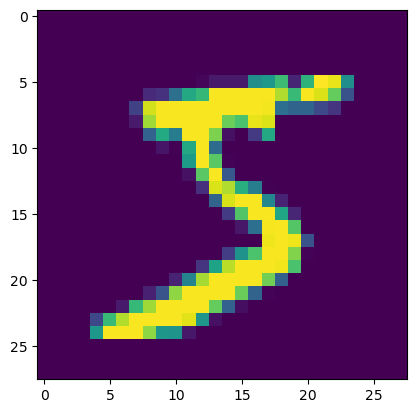

In [12]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0,:,:])
plt.show()

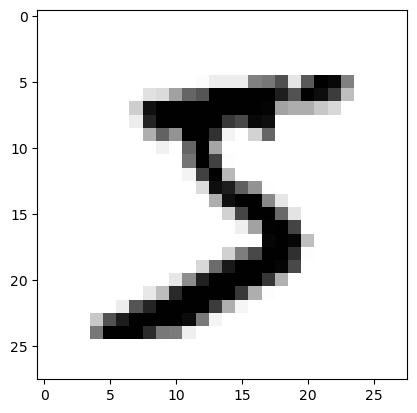

In [13]:
plt.imshow(train_images[0,:,:],cmap=plt.cm.binary)
plt.show()

In [14]:
print(train_labels[0])

5


In [15]:
print(train_labels[25])

2


# Flattering the input

In [16]:
train_images = train_images.reshape(60000,784)
train_images.shape

(60000, 784)

In [17]:
test_images = test_images.reshape(10000,784)
test_images.shape

(10000, 784)

# Normalizing pixel values in the range [0,1]

In [18]:
train_images = train_images.astype('float')/255
test_images = test_images.astype('float')/255
train_images.dtype

dtype('float64')

# Encoding the labels

In [19]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Creating model 1 : Dense NN

In [20]:
from keras import models,layers
model = models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(784,)))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
print(784*512+512)

401920


In [22]:
print(512*10+10)

5130


# Training the NN

In [23]:
model.fit(train_images,train_labels,epochs=5,batch_size=120)
model.evaluate(test_images,test_labels)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8737 - loss: 0.4358
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9681 - loss: 0.1094
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9795 - loss: 0.0690
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9855 - loss: 0.0498
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9901 - loss: 0.0351
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9761 - loss: 0.0717


[0.06275928020477295, 0.9793000221252441]

# Part 2 : Implementing CNN on MNIST dataset (99% to 99.6% accuracy)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models, layers

In [26]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) =mnist.load_data()


In [27]:
 # Reshape and normalize the images
train_images_cnn = train_images.reshape((60000, 28, 28,
1)).astype('float32') / 255
test_images_cnn = test_images.reshape((10000, 28, 28,
1)).astype('float32') / 255

In [28]:
# One-hot encode the labels
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [33]:
# Build the CNN model
cnn_model = models.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')])


C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compile the model
cnn_model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [35]:
# Train the model
cnn_model.fit(train_images_cnn, train_labels_cat,
epochs=5,
batch_size=64,
validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8573 - loss: 0.4822 - val_accuracy: 0.9823 - val_loss: 0.0579
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9818 - loss: 0.0598 - val_accuracy: 0.9877 - val_loss: 0.0417
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.9889 - loss: 0.0361 - val_accuracy: 0.9892 - val_loss: 0.0363
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.9918 - loss: 0.0269 - val_accuracy: 0.9877 - val_loss: 0.0405
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9935 - loss: 0.0215 - val_accuracy: 0.9912 - val_loss: 0.0313


In [36]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(test_images_cnn,test_labels_cat)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9888 - loss: 0.0329
Test accuracy: 0.9923


# Part 3 : Visualizing the wrongly classified images

In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Predict classes
predictions = cnn_model.predict(test_images_cnn)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels_cat, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [39]:
# Find misclassified indices
misclassified_indices = np.where(predicted_classes != true_classes)[0]
print(f"Total misclassified images: {len(misclassified_indices)}")

Total misclassified images: 77


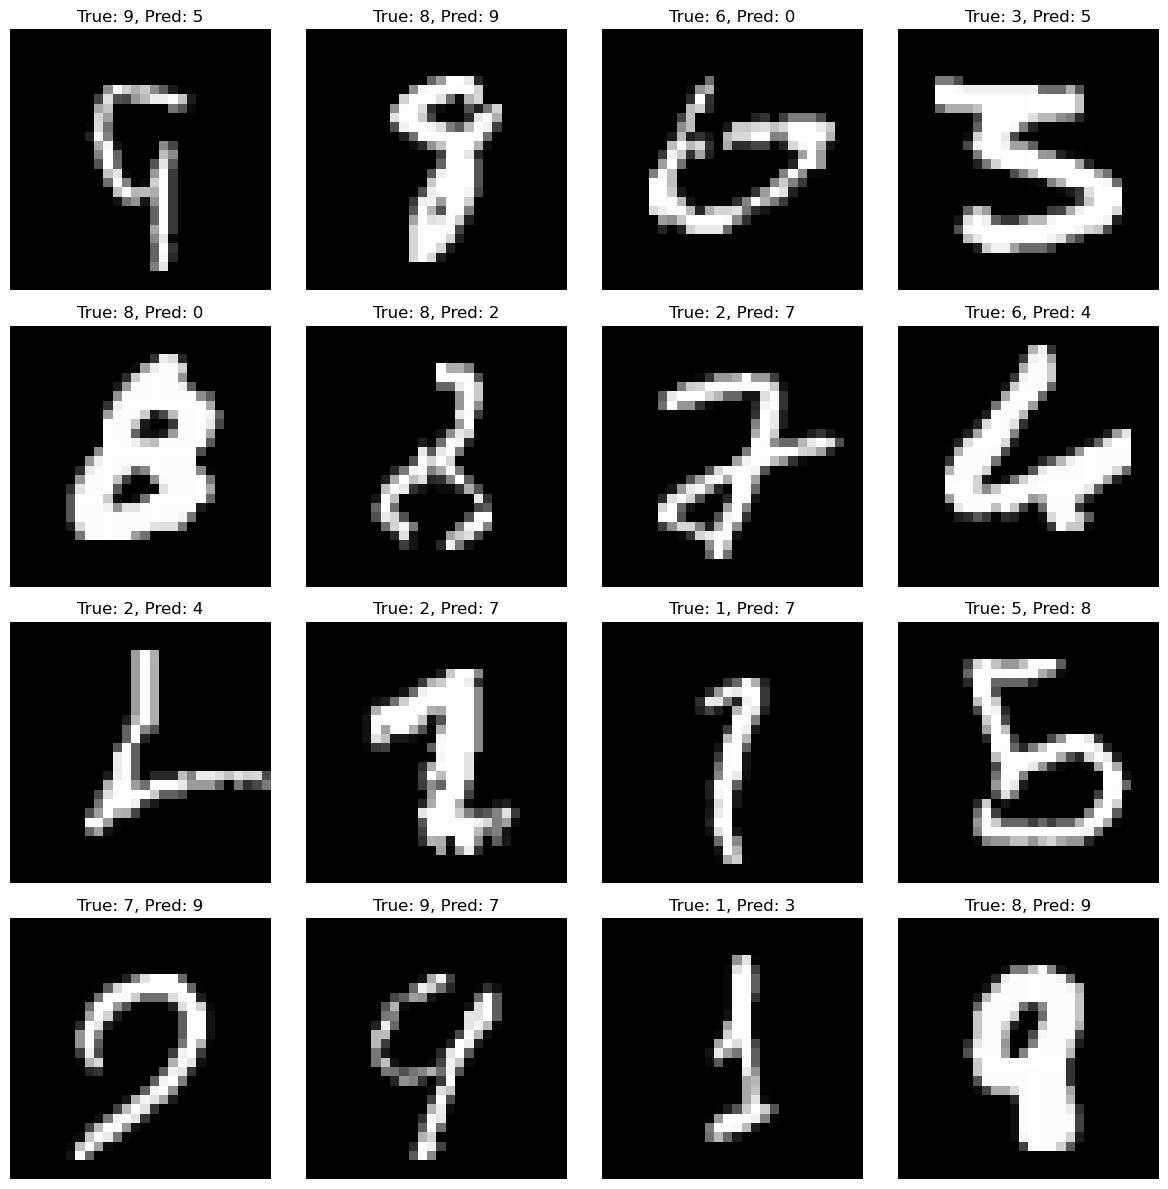

In [47]:
# Plot a few misclassified images
plt.figure(figsize=(12, 12))
for i, idx in enumerate(misclassified_indices[:16]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_images[idx], cmap='gray')
    plt.title(f"True: {true_classes[idx]}, Pred: {predicted_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
